# Default of Credit Card Clients dataset

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
# Make results deterministic
seed = 1234
np.random.seed(seed)
tf.set_random_seed(seed)

Load dataset

In [2]:
# Read csv file
dataset = pd.read_csv('credit_card_clients.csv')
dataset = dataset.drop(columns=['ID'])

continuous_cols = ['AGE', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
target_cols = ['default payment next month']

## Analysis and data cleanup

Analyze dataset

In [3]:
dataset[categorical_cols+["AGE"]+target_cols].describe()

,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500,0.221200
std,0.489129,0.790349,0.521970,9.217904,0.415062
min,1.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,0.000000
max,2.000000,6.000000,3.000000,79.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5336f0250>,
      dtype=object)

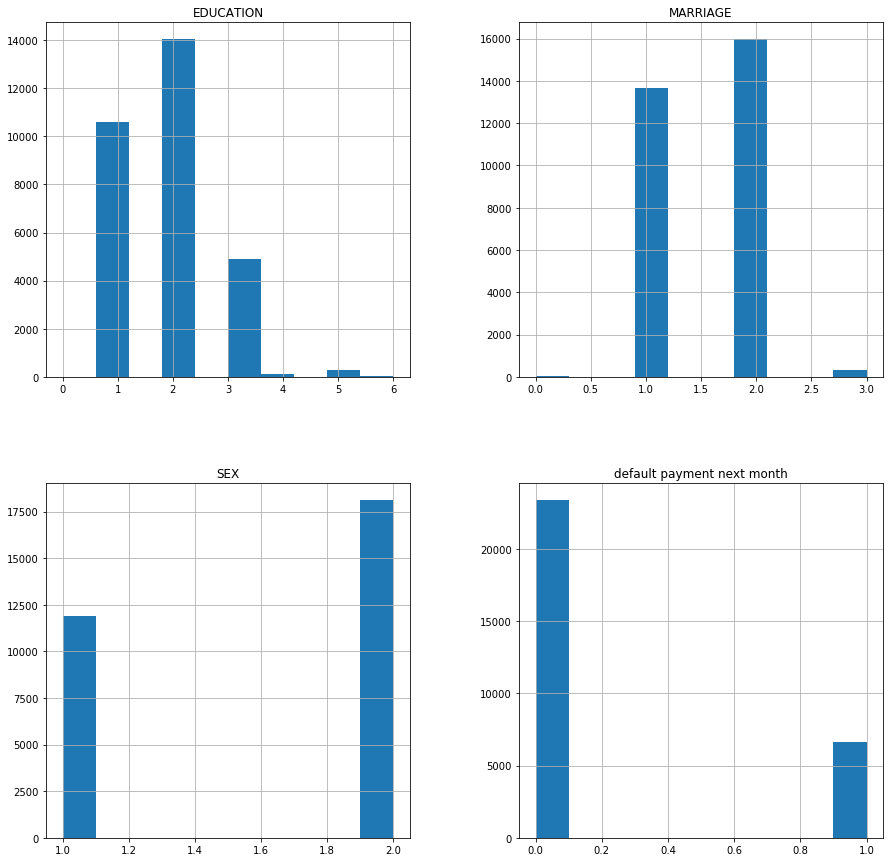

In [4]:
dataset[categorical_cols+target_cols].hist(figsize=(15,15))

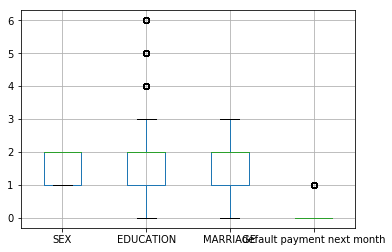

In [5]:
dataset[categorical_cols+target_cols].boxplot()

In [6]:
dataset[continuous_cols].describe()

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Normalization and discretization

In [7]:
# Discretize categorical features
dataset = pd.get_dummies(dataset, columns=["MARRIAGE", "EDUCATION"])
dataset.loc[dataset["SEX"] == 2,"SEX"] = 0

# Categorize age by grouping
df = pd.cut(dataset.AGE, [20,28,34,41,80]).to_frame()
df.columns = ["AGE_RANGE"]
dataset = pd.concat([dataset, df],axis=1)
dataset.AGE_RANGE = dataset.AGE_RANGE.astype('str')
df = pd.get_dummies(dataset.AGE_RANGE)
df.columns = ['AGE_(20, 28]', 'AGE_(28, 34]', 'AGE_(34, 41]', 'AGE_(41, 80]']
dataset = pd.concat([dataset,df],axis=1)

#Normalize continuous features
dataset.loc[:, continuous_cols] = StandardScaler().fit_transform(dataset.loc[:, continuous_cols].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5333c03d0>,
      dtype=object)

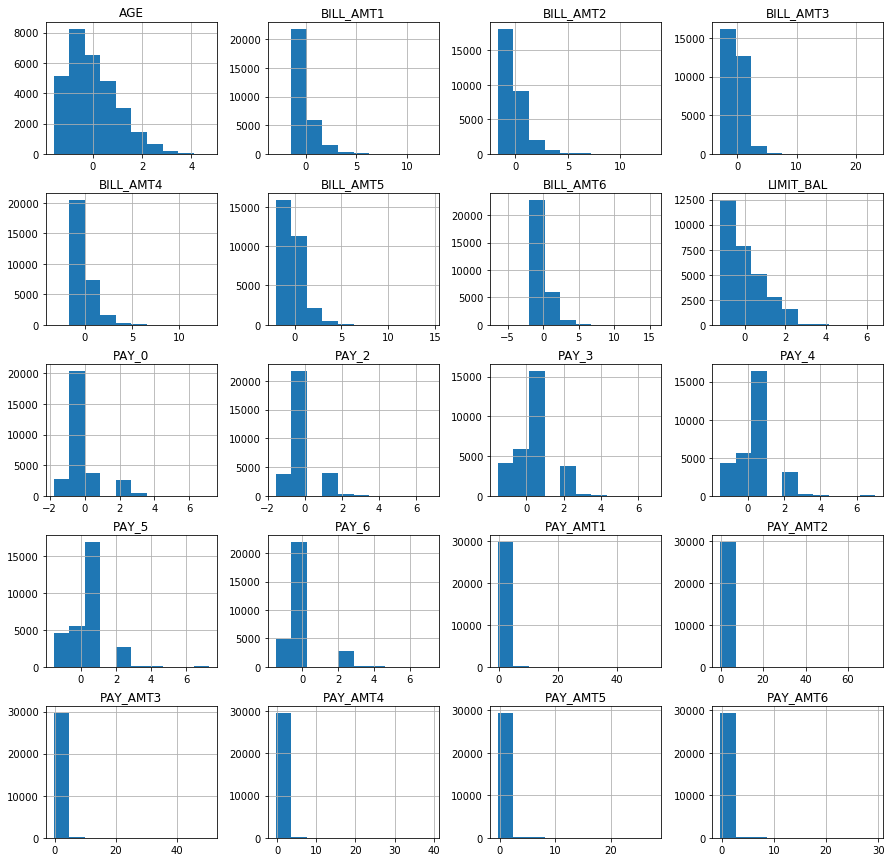

In [8]:
dataset[continuous_cols].hist(figsize=(15,15))

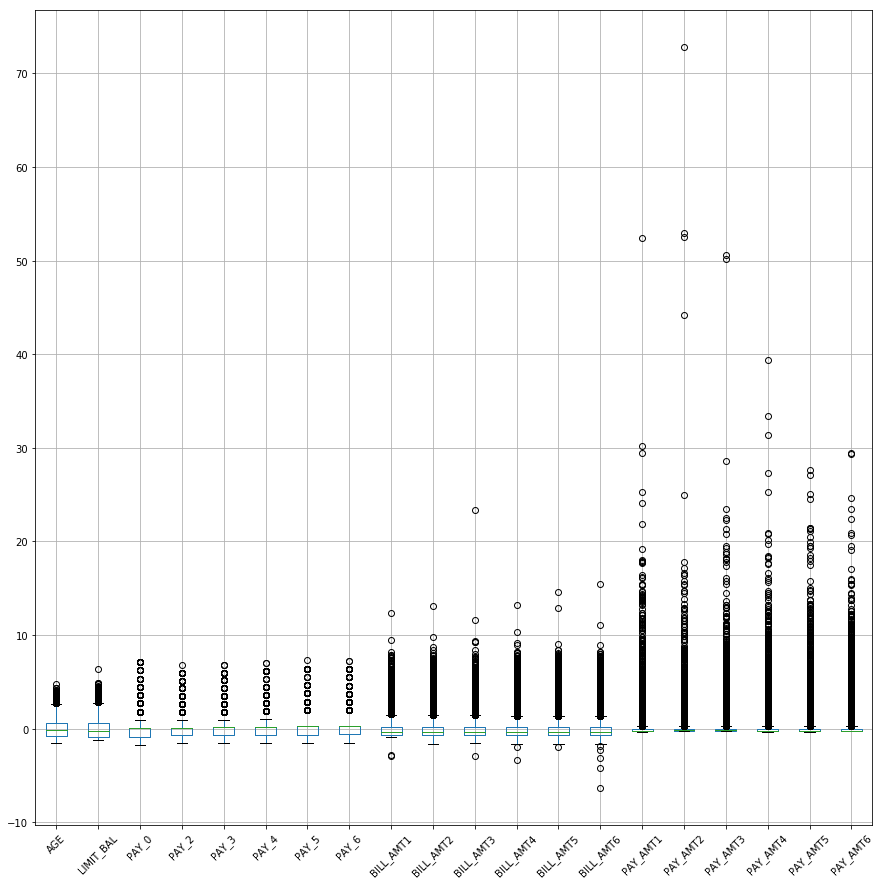

In [9]:
dataset[continuous_cols].boxplot(figsize=(15,15), rot=45)

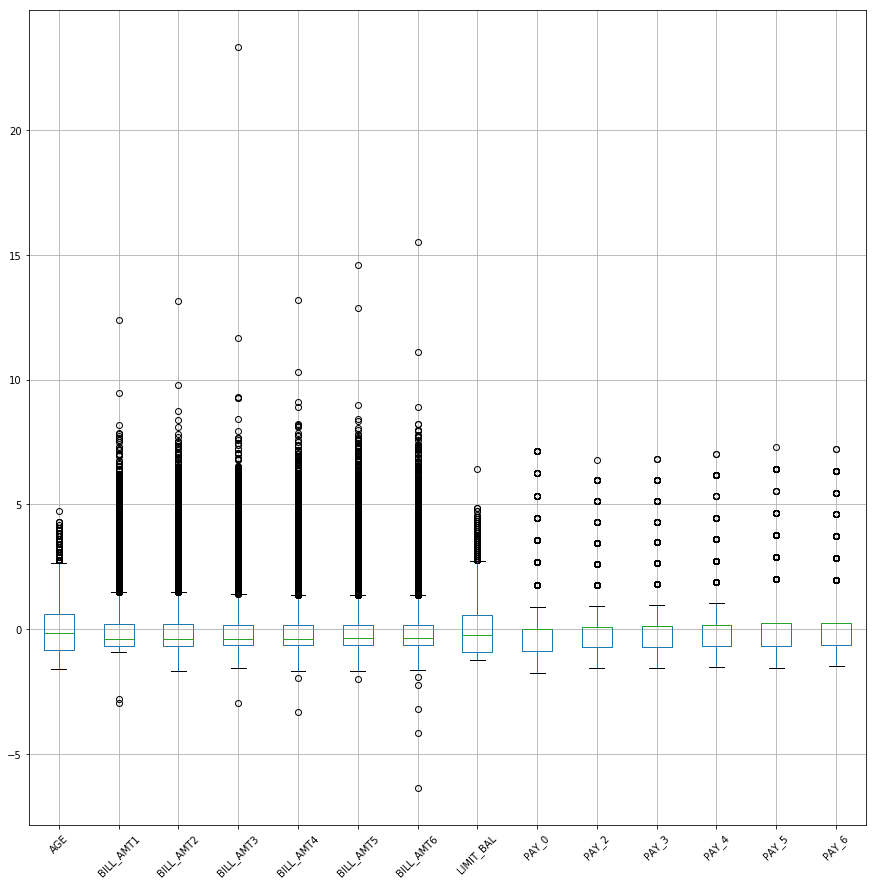

In [10]:
dataset[sorted(set(continuous_cols)-set(["PAY_AMT1","PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]))].boxplot(figsize=(15,15), rot=45)

Correlation analysis

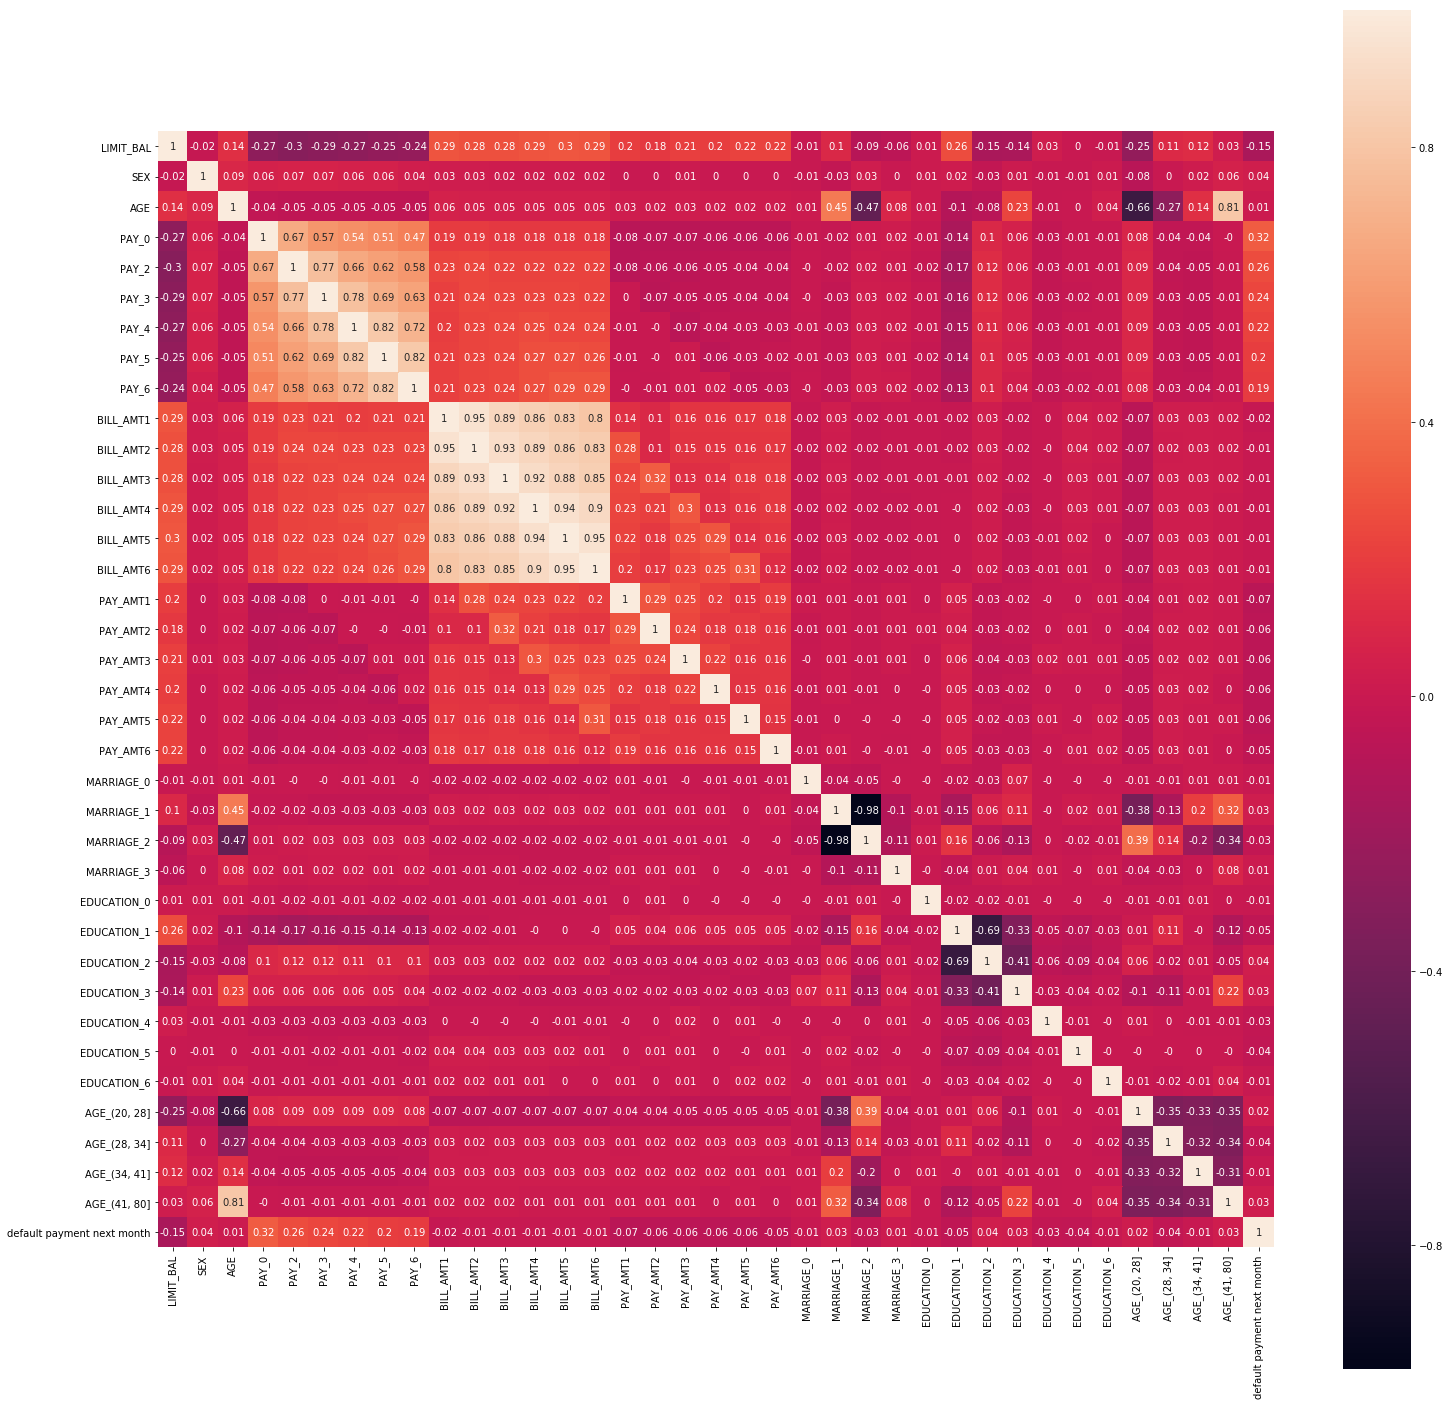

In [11]:
columns = list(dataset.columns.values)
columns.remove(target_cols[0])
columns.append(target_cols[0])

plt.figure(figsize=(25,25))
sns.heatmap(dataset[columns].corr().round(2), vmax=1, square=True, annot=True)

Feature selection

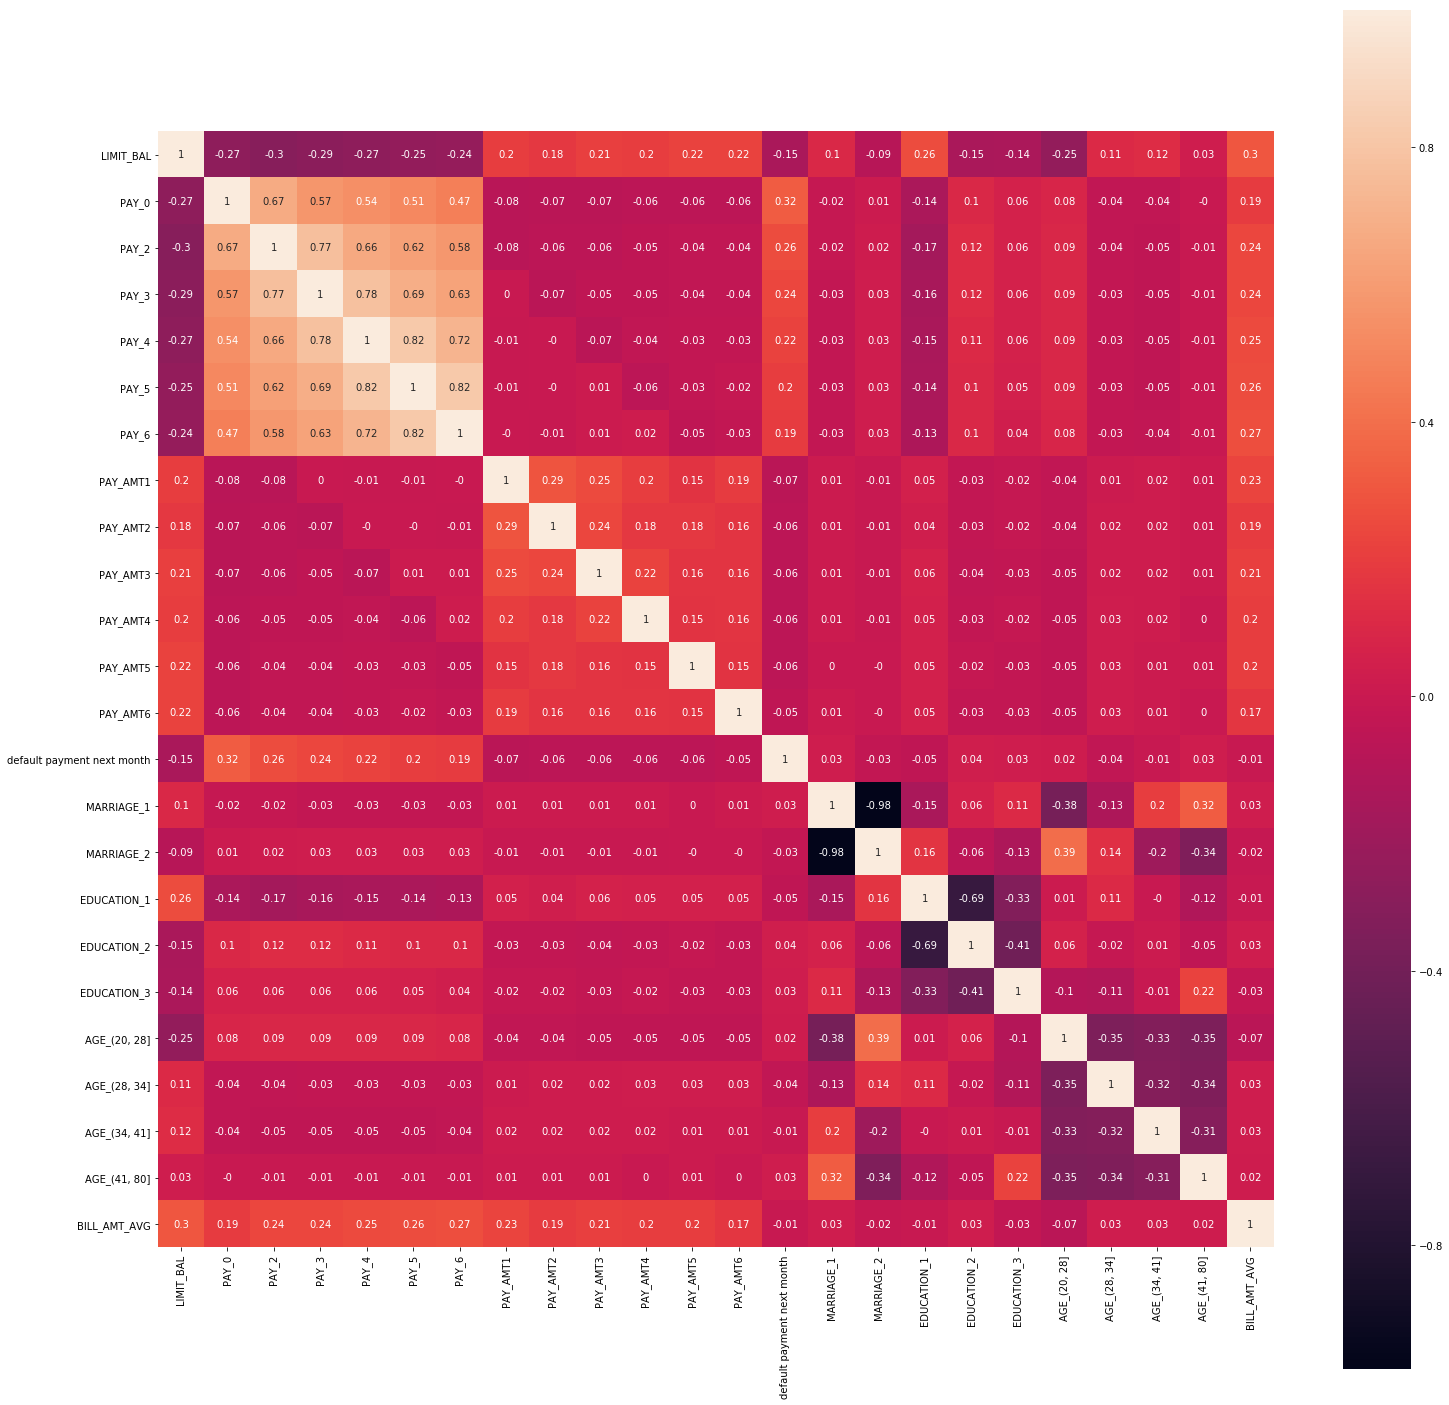

In [12]:
bill_amt_cols = ["BILL_AMT1","BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
dataset["BILL_AMT_AVG"] = dataset[bill_amt_cols].mean(axis=1)

unwanted_cols = bill_amt_cols+["AGE", "AGE_RANGE", "SEX", "EDUCATION_0", "EDUCATION_4", "EDUCATION_5", "EDUCATION_6", "MARRIAGE_0", "MARRIAGE_3"]
dataset = dataset.drop(columns=unwanted_cols)

plt.figure(figsize=(25,25))
sns.heatmap(dataset.corr().round(2), vmax=1, square=True, annot=True)

In [13]:
x_data = dataset.copy()
y_data = x_data.pop("default payment next month")
x_data = x_data.to_numpy()
y_data = y_data.to_numpy()

# Split into train and test
def split_data(x_data, y_data, partition=0.2):
    # Shuffle data
    indexes = np.random.choice(len(x_data), len(x_data), replace=False)
    x_data = x_data[indexes]
    y_data = y_data[indexes]
    
    split_index = int(len(x_data) * partition)
    X_test = x_data[-split_index:]
    X_train = x_data[:-split_index]
    y_test = y_data[-split_index:]
    y_train = y_data[:-split_index]
    return X_train, y_train, X_test, y_test

# Display results
def show_analysis(y_test, y_pred, costs=None, accuracies=None, scores=None):
        print(classification_report(y_pred=y_pred, y_true=y_test))
        
        if costs is not None and accuracies is not None:
            plt.figure(figsize=(15,5))
            plt.subplot(1,2,1)
            plt.plot(range(epochs), costs)
            plt.title("Loss Change")
            plt.xlabel("Number of Iterations")
            plt.ylabel("Loss")
            plt.subplot(1,2,2)

            plt.plot(range(epochs), accuracies)
            plt.title("Training Accuracy")
            plt.xlabel("Number of Iterations")
            plt.ylabel("Accuracy Ratio")
            plt.show()
        
        plt.figure(figsize=(15,5))
        cm = confusion_matrix(y_test, y_pred)
        plt.subplot(1,2,1)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        
        if scores is not None:
            fpr_test, tpr_test, _ = roc_curve(y_test, scores)
            roc_auc = auc(fpr_test, tpr_test)
            plt.subplot(1,2,2)
            plt.plot(fpr_test, tpr_test, label='ROC curve (area = %f)' % roc_auc)
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC curve')
            plt.legend(loc="lower right")
        plt.show()

partitions = (0.3, 0.2, 0.1)

## Sklearn classifier models

Define models

In [14]:
models = [
    LogisticRegression(solver="liblinear"),
    KNeighborsClassifier(n_neighbors=1),
    RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0),
    SVC(gamma='auto', probability=True)
]

Train the models

In [15]:
def train_model(clf, X_train, y_train, X_test, y_test):
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = clf.predict_proba(X_test)
    show_analysis(y_test, y_pred, scores=scores[:, 1])


Training LogisticRegression with a test partition of 30.0%

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7014
           1       0.70      0.25      0.36      1986

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000



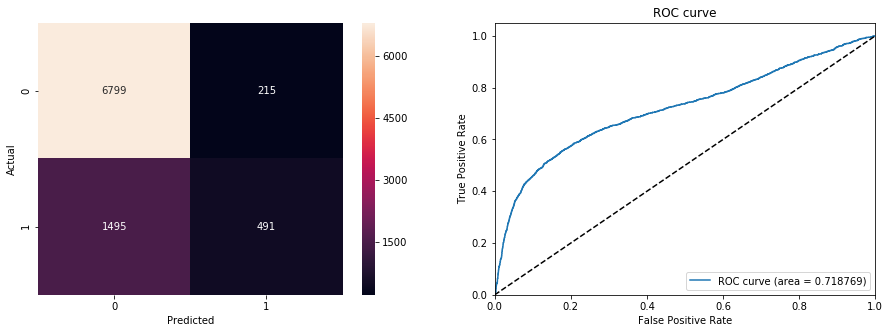


Training LogisticRegression with a test partition of 20.0%

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4689
           1       0.68      0.24      0.35      1311

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



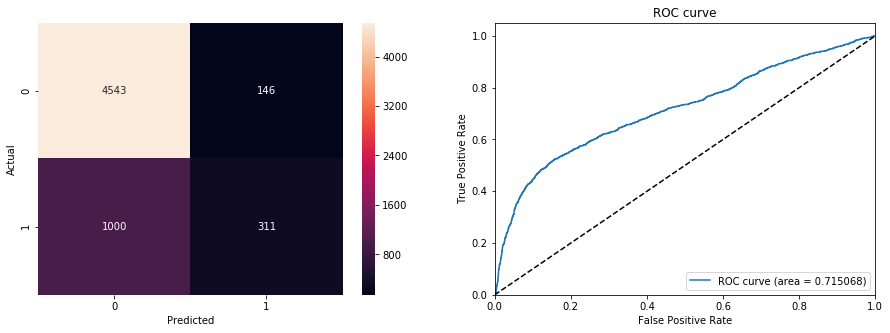


Training LogisticRegression with a test partition of 10.0%

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2337
           1       0.74      0.24      0.36       663

    accuracy                           0.81      3000
   macro avg       0.78      0.61      0.63      3000
weighted avg       0.80      0.81      0.77      3000



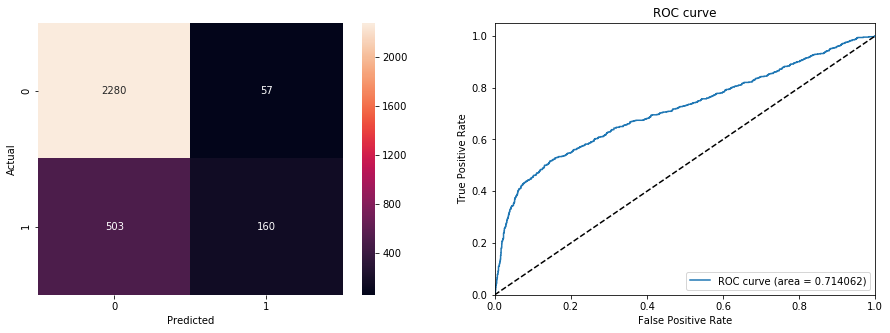


Training KNeighborsClassifier with a test partition of 30.0%

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7019
           1       0.38      0.40      0.39      1981

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000



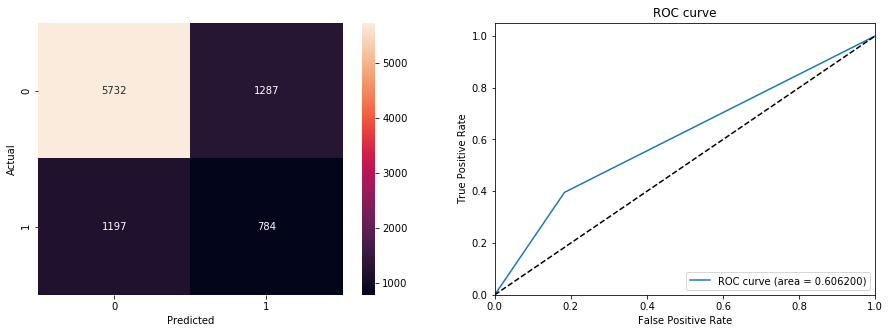


Training KNeighborsClassifier with a test partition of 20.0%

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4687
           1       0.37      0.38      0.38      1313

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000



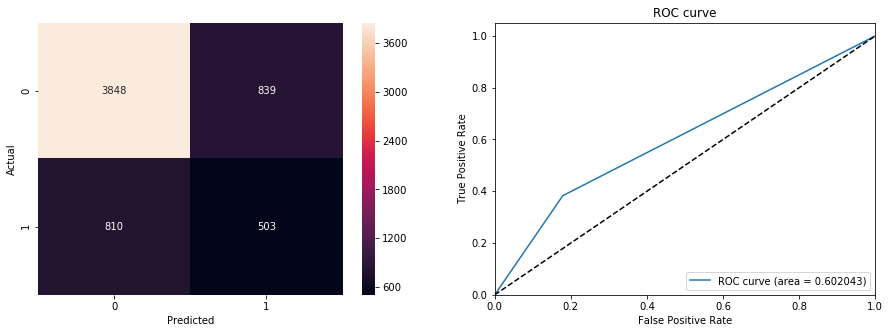


Training KNeighborsClassifier with a test partition of 10.0%

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2333
           1       0.38      0.39      0.38       667

    accuracy                           0.73      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.73      0.72      0.73      3000



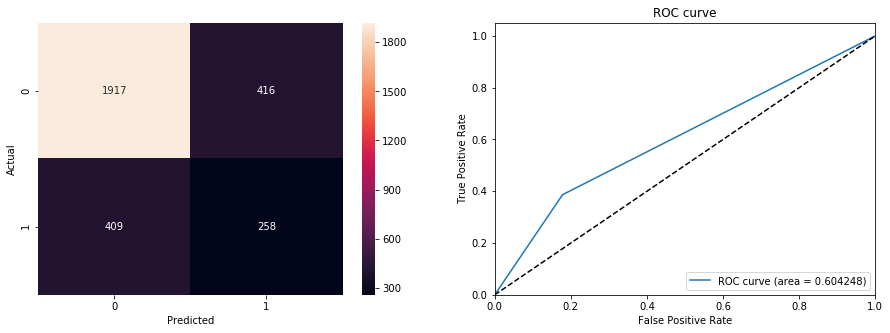


Training RandomForestClassifier with a test partition of 30.0%

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7041
           1       0.64      0.38      0.47      1959

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



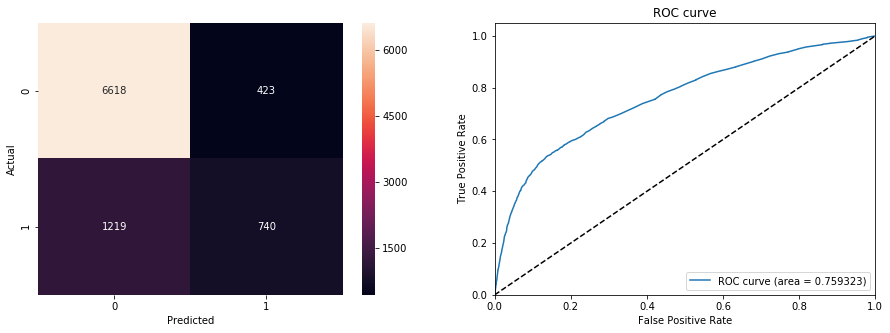


Training RandomForestClassifier with a test partition of 20.0%

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4663
           1       0.63      0.39      0.48      1337

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



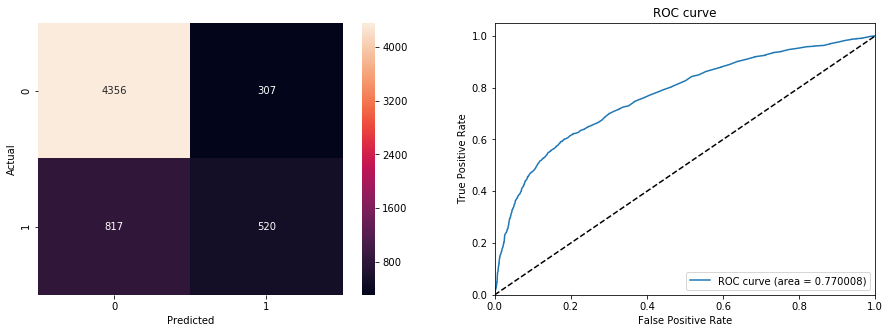


Training RandomForestClassifier with a test partition of 10.0%

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2332
           1       0.60      0.37      0.45       668

    accuracy                           0.81      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.81      0.79      3000



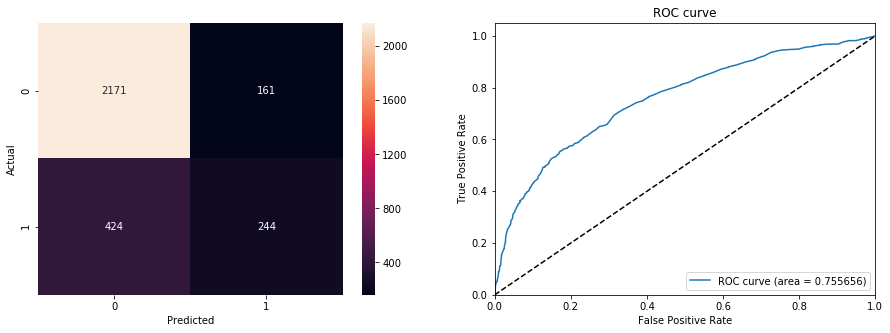


Training SVC with a test partition of 30.0%



KeyboardInterrupt: 

In [16]:
for clf in models:
    for partition in partitions:
        print("\nTraining {} with a test partition of {}%\n".format(clf.__class__.__name__, partition*100))
        train_model(*([clf]+list(split_data(x_data, y_data, partition))))

## Tensorflow multi-layer network

Define network

In [26]:
learning_rate = 0.1
epochs = 10000
h1_nodes = 16
h2_nodes = 16
h3_nodes = 8
h4_nodes = 8
h5_nodes = 8
h6_nodes = 4
h7_nodes = 4

x = tf.placeholder(tf.float32, [None, x_data.shape[1]])
y = tf.placeholder(tf.int32, [None])

W1 = tf.Variable(tf.random_normal([x_data.shape[1], h1_nodes]), name='W1')
b1 = tf.Variable(tf.random_normal([h1_nodes]), name='b1')
h1 = tf.nn.tanh(tf.add(tf.matmul(x, W1), b1))

W2 = tf.Variable(tf.random_normal([h1_nodes, h2_nodes]), name='W2')
b2 = tf.Variable(tf.random_normal([h2_nodes]), name='b2')
h2 = tf.nn.tanh(tf.add(tf.matmul(h1, W2), b2))

W3 = tf.Variable(tf.random_normal([h2_nodes, h3_nodes]), name='W3')
b3 = tf.Variable(tf.random_normal([h3_nodes]), name='b3')
h3 = tf.nn.tanh(tf.add(tf.matmul(h2, W3), b3))

W4 = tf.Variable(tf.random_normal([h3_nodes, h4_nodes]), name='W4')
b4 = tf.Variable(tf.random_normal([h4_nodes]), name='b4')
h4 = tf.nn.tanh(tf.add(tf.matmul(h3, W4), b4))

W5 = tf.Variable(tf.random_normal([h4_nodes, h5_nodes]), name='W5')
b5 = tf.Variable(tf.random_normal([h5_nodes]), name='b5')
h5 = tf.nn.tanh(tf.add(tf.matmul(h4, W5), b5))

W6 = tf.Variable(tf.random_normal([h5_nodes, h6_nodes]), name='W6')
b6 = tf.Variable(tf.random_normal([h6_nodes]), name='b6')
h6 = tf.nn.tanh(tf.add(tf.matmul(h5, W6), b6))

W7 = tf.Variable(tf.random_normal([h6_nodes, h7_nodes]), name='W7')
b7 = tf.Variable(tf.random_normal([h7_nodes]), name='b7')
h7 = tf.nn.tanh(tf.add(tf.matmul(h6, W7), b7))

W8 = tf.Variable(tf.random_normal([h7_nodes, 2]), name='W8')
b8 = tf.Variable(tf.random_normal([2]), name='b8')
y_pred = tf.add(tf.matmul(h7, W8), b8)

error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred), name="loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)

init = tf.global_variables_initializer()
evaluation = tf.nn.in_top_k(y_pred, y, 1)
accuracy = tf.reduce_mean(tf.cast(evaluation, tf.float32))
prediction = tf.argmax(y_pred, 1)
prob0, prob1 = tf.split(tf.nn.softmax(y_pred), [1, 1], 1)
predict_proba = tf.reshape((tf.subtract(prob1, prob0)+1)/2, [-1])

Train the network

In [18]:
def train_network(X_train, y_train, X_test, y_test):
    y_categorical = pd.DataFrame(y_test).idxmax(axis=1)
    costs = []
    accu = []
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs):
            _, c = sess.run([optimizer, error], feed_dict={x: X_train, y: y_train})
            costs.append(c)
            a = sess.run(accuracy, feed_dict={x: X_test, y: y_test})*100
            accu.append(a)
        scores = sess.run(predict_proba, feed_dict={x: X_test, y: y_test})
        pred = sess.run(prediction, feed_dict={x: X_test, y: y_test})
        show_analysis(y_test, pred, costs, accu, scores)

Training DNN with a test partition of 30.0%
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7005
           1       0.50      0.28      0.36      1995

    accuracy                           0.78      9000
   macro avg       0.66      0.60      0.61      9000
weighted avg       0.75      0.78      0.75      9000



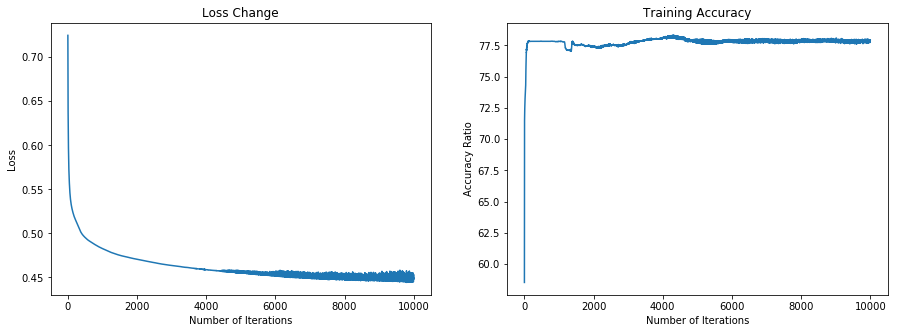

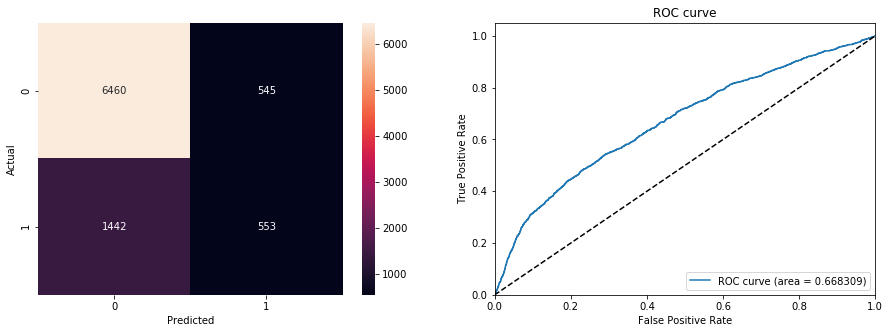

Training DNN with a test partition of 20.0%
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4669
           1       0.51      0.27      0.35      1331

    accuracy                           0.78      6000
   macro avg       0.66      0.60      0.61      6000
weighted avg       0.75      0.78      0.75      6000



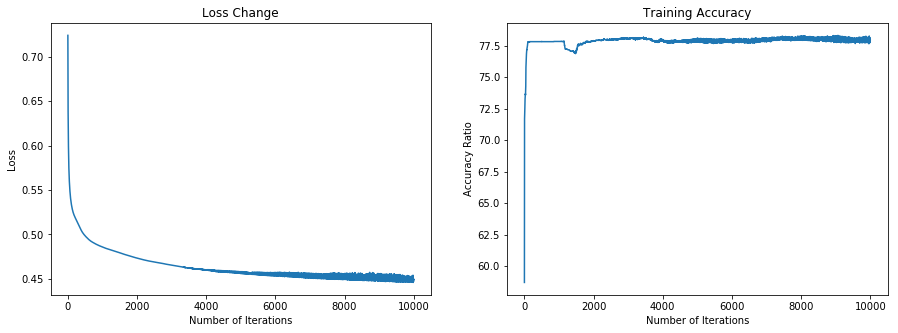

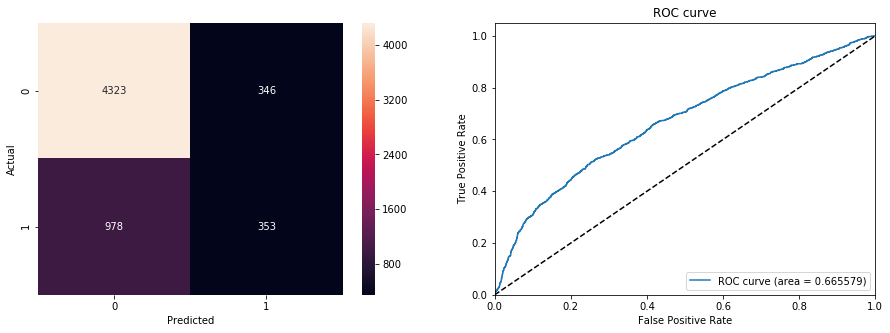

Training DNN with a test partition of 10.0%


In [ ]:
for partition in partitions:
    print("Training DNN with a test partition of {}%".format(partition*100))
    train_network(*split_data(x_data, y_data, partition))